In [50]:
import numpy as np
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
import os, sys
import skimage
import cv2
import pickle as pkl
# np.set_printoptions(threshold=sys.maxsize)

(640, 480) I


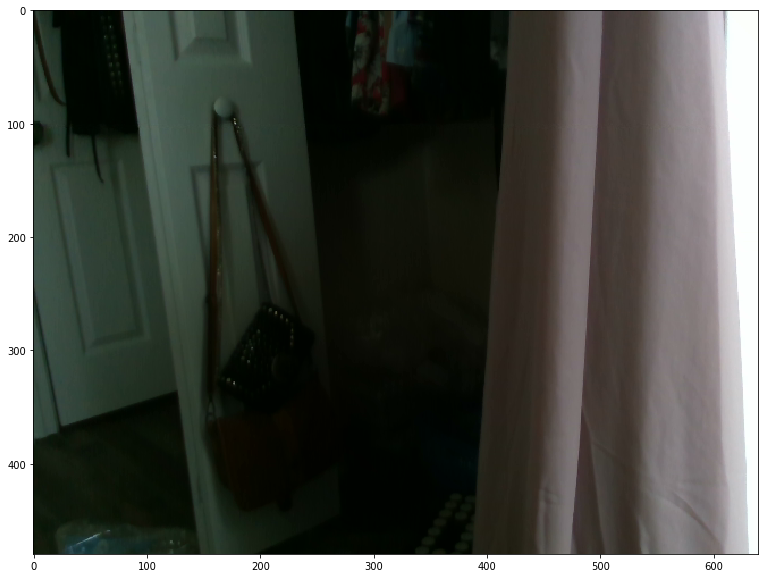

In [116]:
# im = Image.open('./export/out_1/d/frame_0100_d_1583869334951745986.png')
im = Image.open('./export/align_sync_same_number_images/aligned_depth_to_color/frame_0150_d_1595177879347265776.png')
print(im.size, im.mode)
# im
# im2 = Image.open('./export/out_1/rgb/frame_0100_rgb_1583869334953597453.png')
im2 = Image.open('./export/align_sync_same_number_images/rgb/frame_0150_rgb_1595177879315112833.png')
# im2.mode
plt.imshow(im2)
# PIL.ImageOps.invert(im.convert('RGB'))

In [117]:
# recenter resultant image
# T = np.array([
#     [0.999994, 0.00334682, 14.9153],
#     [-0.00334019, 0.999973, -0.320785],
#     [0, 0, 1]])

# coeffs = np.array([
#     [3*0.999994, 3*0.00334682, 3*0.000991736, 3*14.9153],
#     [-0.00334019, 3*0.999973, -0.00660826, -0.320785],
#     [-0.00101383, 0.0066049, 3*0.999978, -0.523442], 
#     [0,0,0,1]])

# T_inv = np.linalg.inv(T)
# img_transformed = im2.transform((640, 480), Image.AFFINE, data=T_inv.flatten()[:6], resample=Image.NEAREST)
# # H_t = im2.transform((640, 480), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
# plt.imshow(np.asarray(img_transformed))

(480, 640) (480, 640, 3)


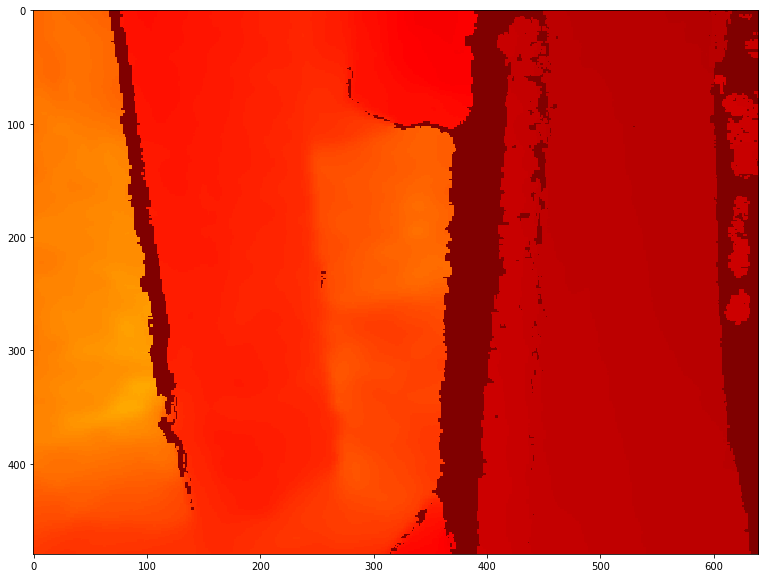

In [125]:
depth_image = np.asarray(im)
color_image = np.asarray(im2)

# color_image2 = np.asarray(img_transformed)

# Remove background - Set pixels further than clipping_distance to grey
grey_color = 153
clipping_distance_in_meters = 1.5 #1 meter
depth_scale = .001
clipping_distance = clipping_distance_in_meters / depth_scale
depth_image_3d = np.dstack((depth_image,depth_image,depth_image)) #depth image is 1 channel, color is 3 channels
bg_removed = np.where((depth_image_3d > clipping_distance) | (depth_image_3d <= 0), grey_color, color_image)

# bg_removed2 = np.where((depth_image_3d > clipping_distance) | (depth_image_3d <= 0), grey_color, color_image2)

depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
print(depth_image.shape, depth_colormap.shape)
plt.imshow(depth_colormap)
plt.show()
# np.unique(numpy_i)

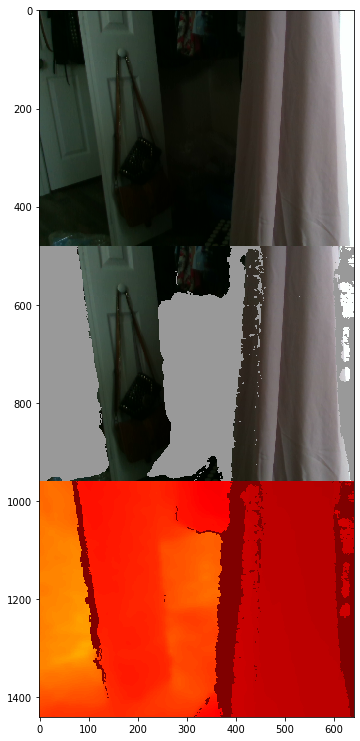

In [126]:
images = np.vstack((im2, bg_removed, depth_colormap))
# images2 = np.hstack((img_transformed, bg_removed2, depth_colormap))
# Images = np.vstack((images, images2))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(images)
plt.show()

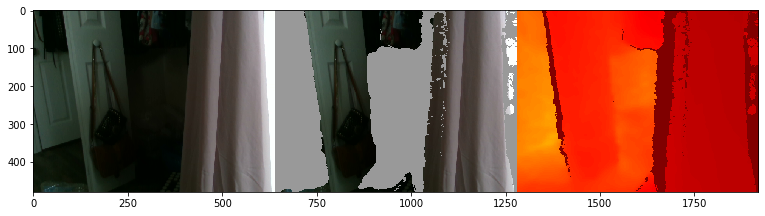

In [127]:
images = np.hstack((im2, bg_removed, depth_colormap))
plt.imshow(images)
plt.show()

In [114]:
pixels = np.asarray(im)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# clip pixel values to [-1,1]
pixels = np.clip(pixels, -1.0, 1.0)
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 595.421, Standard Deviation: 240.218
Mean: 0.548, Standard Deviation: 0.337
Min: 0.000, Max: 1.000


In [115]:
# test_image = skimage.color.gray2rgb(numpy_i)
# img = PIL.Image.fromarray(test_image, 'RGB')
# img
pixels

array([[0.66147685, 0.66563976, 0.66563976, ..., 0.10573196, 0.10365054,
        0.10365054],
       [0.66147685, 0.66563976, 0.66563976, ..., 0.10573196, 0.10573196,
        0.10573196],
       [0.66147685, 0.66563976, 0.66563976, ..., 0.10573196, 0.10573196,
        0.10573196],
       ...,
       [0.55116045, 0.55116045, 0.55532336, ..., 0.086999  , 0.086999  ,
        0.08491755],
       [0.5469976 , 0.5469976 , 0.5532419 , ..., 0.086999  , 0.086999  ,
        0.08491755],
       [0.5469976 , 0.5469976 , 0.55116045, ..., 0.086999  , 0.086999  ,
        0.08491755]], dtype=float32)

In [103]:
del im, im2

In [105]:
file = open("./export/out_1/imu.pkl",'rb')
object_file = pkl.load(file)
file.close()

In [110]:
object_file[0]